# Modelo SIR (Susceptibles, Infectados, Recuperados)

## Integrantes:
- Francisco Alexander Sotomayor Pineda
- Nicolás Ramírez Castro
- Mónica Santiago Hernández

## Objetivos generales:
- Caracterizar la evolución de una epidemia que se propaga mediante contagio entre los individuos de una población.

## Objetivos específicos:
- Poner en práctica el conocimiento adquirido en el módulo 3 del curso.
- Hacer uso del modelo de Kermack y McKendrick para relacionar las variaciones de las tres poblaciones (Susceptible, Infectada y Recuperada) a través de la tasa de infección y el período infeccioso promedio.

## Modelo que representa el problema
El modelo básico SIR (Susceptibles-Infectados-Recuperados) de Kermack y McKendrick es un modelo de compartimentos donde la población bajo estudio se divide en clases epidemiológicas y se describe un flujo entre ellas; en este modelo el compartimento del centro mide la prevalencia, es decir, el número de casos de una enfermedad en la población en un tiempo dado, o sea, I(t).

El modelo básico SIR de Kermack y McKendrick asume que la población total N se mantiene constante en el tiempo, o sea, es la suma de los susceptibles más los infectados más los recuperados: <br>

$$ N = S(t) + I(t) + R(t) $$

La transmisión es por contacto directo. Para transmitir la infección, un infeccioso hace contacto con βN individuos por unidad de tiempo. La probabilidad de contacto entre un infeccioso y un susceptible es S/N, luego el número de nuevas infecciones por unidad de tiempo es (βN)(S/N)I= βS I. Es decir, un infeccioso transmite la enfermedad con una tasa de contagio β, según la ley de acción de masas. Esto significa que los cambios en la población susceptible también se comportan según la ley de acción de masas. Por otra parte, una fracción ν de infectados por unidad de tiempo deja esa clase para convertirse en recuperados con inmunidad permanente. Esto conduce al sistema de ecuaciones diferenciales del modelo SIR: <br>

$$ \frac {d}{dt} S(t) = -BS(t)I(t) $$
$$ \frac {d}{dt} I(t) = BS(t)I(t) - vI(t) $$
$$ \frac {d}{dt} R(t) = vI(t) $$

## Proceso

Importar las bibliotecas

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Ponemos la población total a considerar, además agregamos: los valores iniciales de personas infectadas (I0), las personas que se recuperaron (R0) y las personas que están sujetas a infección inicialmente (S0), las cuales son el resto de la población. Utilizaremos la población mexicana actual. Habrá 1 infectado y 0 personas recuperadas.

In [2]:
N = 126014024
I0, R0 = 1, 0
S0 = N - I0 - R0

Obtenemos la Tasa de transmisión el cuál está representado por beta (β) y la Tasa de recuperación en 1/días representado por gamma (γ). 
Establecemos el tiempo durante el cual vamos a simular el comportamiento de la enfermedad. En este caso utilizaremos 30 días.

In [5]:
beta, gamma = 2.2, 1./5.2
t = np.linspace(0, 30, 31)

Utilizamos las ecuaciones diferenciales del modelo SIR.

In [6]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Obtenemos el Vector de las condiciones iniciales y resolvemos el sistema de ecuaciones diferenciales, en la secuencia de días que ya definimos.

In [7]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

## Visualización de los resultados

Trazamos los datos en tres curvas separadas para S(t), I(t) y R(t):

/var/folders/zc/nh109mkj6pld9slq4vyqbcnm0000gn/T/ipykernel_1591/2701628032.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


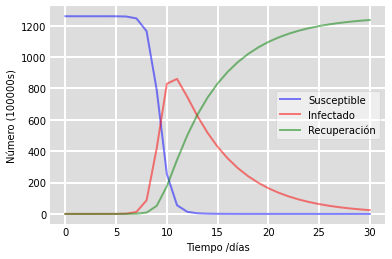

In [17]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/100000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/100000, 'r', alpha=0.5, lw=2, label='Infectado')
ax.plot(t, R/100000, 'g', alpha=0.5, lw=2, label='Recuperación')
ax.set_xlabel('Tiempo /días')
ax.set_ylabel('Número (100000s)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Conclusiones
Es importante conocer cómo se comportan las enfermedades extremadamente contagiosas, especialmente en poblaciones tan grandes como la mexicana. Podemos observar cómo la tasa de infectados crece de manera exponencial. Los recuperados también crecen conforme pasa el tiempo y la tasa de infectados empieza a disminuir. 
Es obvio que la simulación no es muy apegada a la realidad, pues existen otros factores que también influyen en la evolución de la enfermedad dentro de la población, sin embargo podemos observar como el mejor escenario para una pronta recuperación de la población en una pandemia como la de nuestro proyecto es que la población se infecte rápidamente. Podemos observar en la gráfica que el pico de infectados ocurrió entre los días 10 y 12, de ahí en adelante fue decreciendo hasta que en el día 30 se acercó a los 0 infectados. 

## Referencias
- (2020). Modelos matemáticos. Disponible en: http://www.scielo.org.co/scielo.php?pid=S1657-95342020000200009&script=sci_arttext&tlng=es .[Consultado el 30 de noviembre de 2022]
- Martín Barroso, Víctor. (2020). Una breve introducción al modelo SIR. Disponible en: https://eprints.ucm.es/id/eprint/60026/ .[Consultado el 30 de noviembre de 2022]